In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

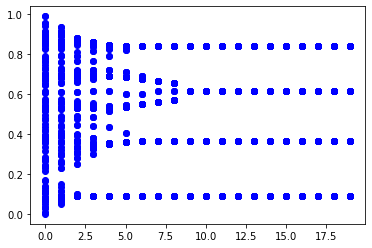

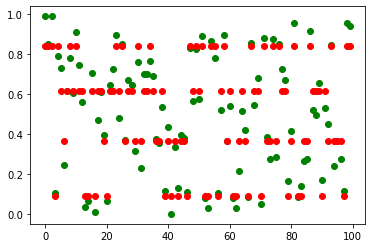

In [18]:
network_size = 100
iterations = 20
tolerance = 0.1

opinions = np.random.rand((network_size))
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(len(opinions)):
        like_minded = []
        for person in opinions:
            if abs(person - opinions[i]) < tolerance:
                like_minded.append(person)
        newopinions[i] = np.mean(like_minded)
        
    plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    allopinions.append(opinions)

plt.show()


plt.plot(initial,'go')
plt.plot(opinions, 'ro')
plt.show()


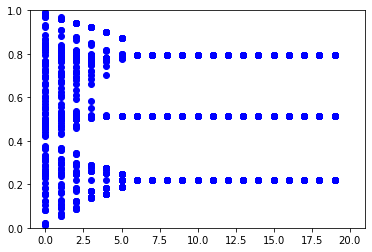

In [9]:
x1 = []
for iter in range(iterations):
    x1.append(iter * np.ones(network_size))
    
# set up animation plots
fig, ax = plt.subplots()

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(x1[i], allopinions[i])
    old = ax.scatter(x1[i], allopinions[i], color = 'b')
    return [l, old]
    
ax.axis([-1,21,0,1])
l, = ax.plot([],[],'b.')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

KeyboardInterrupt: 

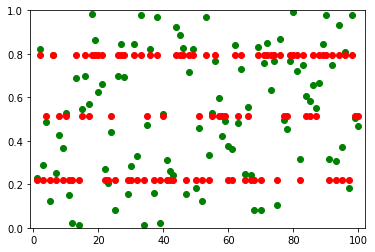

In [10]:
x2 = np.linspace(1, network_size, 100)

# set up animation plots
fig, ax = plt.subplots()
ax.plot(x2, initial, 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(x2, allopinions[i])
    return [l]
    
ax.axis([-1,102,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

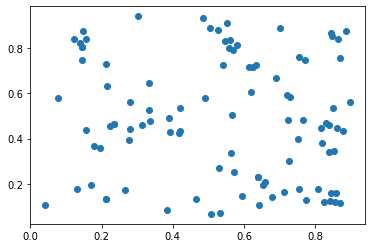

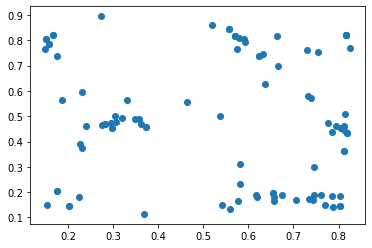

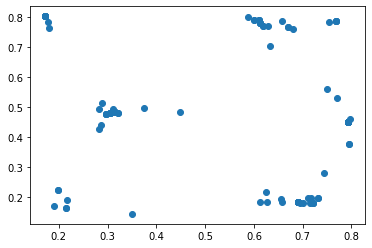

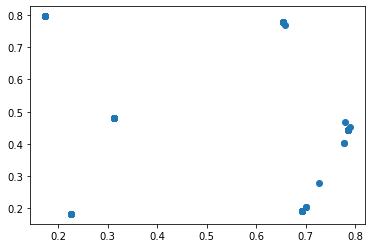

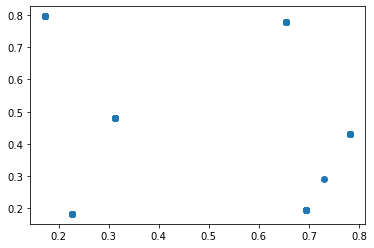

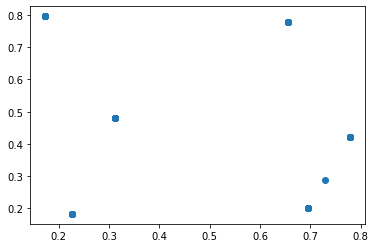

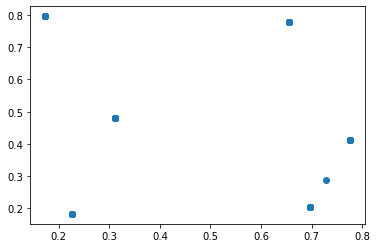

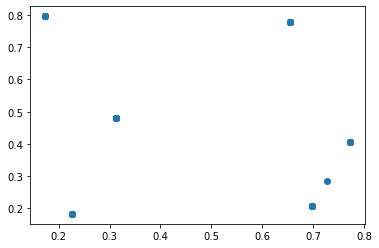

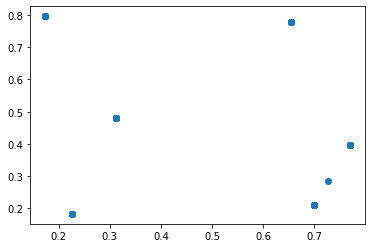

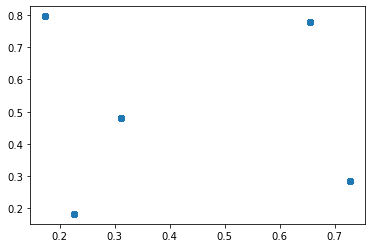

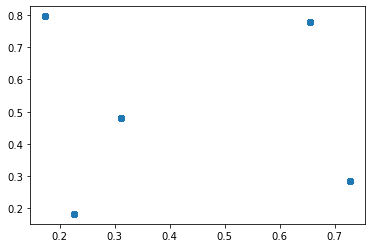

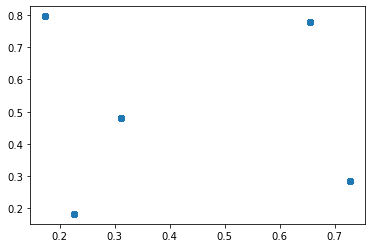

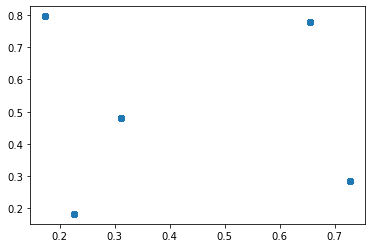

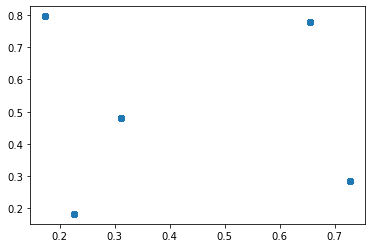

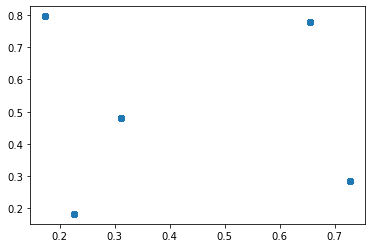

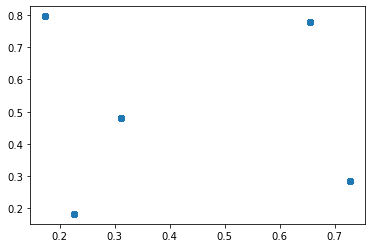

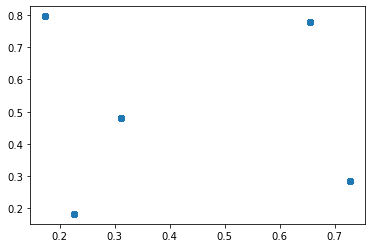

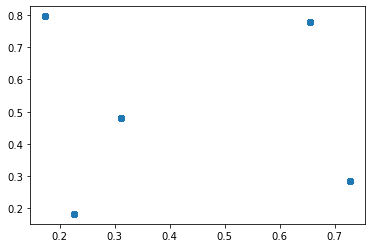

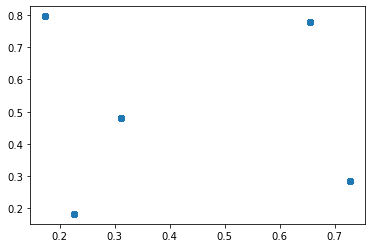

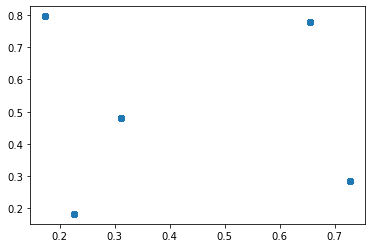

[array([[0.89479183, 0.8959512 ],
       [0.78914383, 0.75121453],
       [0.60782696, 0.71761277],
       [0.67992191, 0.09404718],
       [0.09399035, 0.80098138],
       [0.61904741, 0.70582106],
       [0.65082947, 0.71299765],
       [0.969354  , 0.38973446],
       [0.55712767, 0.26499368],
       [0.90276129, 0.3483881 ],
       [0.74540598, 0.17771754],
       [0.87707654, 0.45812669],
       [0.6985724 , 0.12837276],
       [0.38419907, 0.39224306],
       [0.19909612, 0.09839754],
       [0.77527899, 0.94346513],
       [0.74203154, 0.28792206],
       [0.43447998, 0.40292495],
       [0.58926243, 0.81024261],
       [0.55908747, 0.50844922],
       [0.4013782 , 0.38651209],
       [0.86550566, 0.75526374],
       [0.88919507, 0.071831  ],
       [0.57129145, 0.1357254 ],
       [0.54645642, 0.35501144],
       [0.20701662, 0.49577412],
       [0.13874794, 0.20390438],
       [0.00260974, 0.02066071],
       [0.73541669, 0.47952533],
       [0.49850344, 0.27384526],
       [0

In [44]:
# Two opinions

network_size = 100
iterations = 20
tolerance = 0.2

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])

        newopinions[i,0] = np.mean(like_minded_1)
        newopinions[i,1] = np.mean(like_minded_2)

    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    plotopinions = np.transpose(opinions)
    plt.scatter(opinions[:,0], opinions[:,1])
    plt.show()
    allopinions.append(opinions)

print(allopinions)